In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sbn

In [114]:
raw_data = pd.read_csv('../Data/population.csv')


In [115]:
raw_columns = list(raw_data.columns)
print(raw_columns)

['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR']


In [116]:
def preprocessing(df):

    #Replacing missing data with NaN
    df = df.replace('[\?,)]', np.nan, regex=True)

    #drop columns with more than 40% missing data (NaN value)
    cols = df.columns
    missing_percentages = (df.isna().sum() / len(df)) * 100
    cols_to_drop = []
    for col in cols:
        if(missing_percentages[col] > 40.0):
            cols_to_drop.append(col)
    # print(cols_to_drop)
    df = df.drop(cols_to_drop, axis=1)
    # print(df.shape)
    


    # missing_threshold = 40
    # num_data = df.shape[0]
    # thresh_num = int(((100 - missing_threshold) / 100) * num_data)
    # before = df.shape[1]
    # df = df.dropna(axis=1, thresh=thresh_num)
    # print(f'Before = {before} | Thresh = {thresh_num} | After = {df.shape[1]}')
    return df
    

In [117]:
data_df = preprocessing(raw_data)
data_df.shape

(199523, 36)

In [118]:
data_columns = list(data_df.columns)
print(data_columns)

['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR']


In [119]:
len(data_df['ACLSWKR'].unique())

9

<AxesSubplot:xlabel='AAGE', ylabel='Count'>

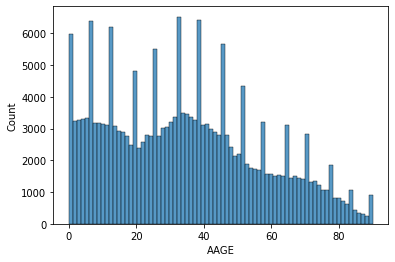

In [121]:
sbn.histplot(data_df['AAGE'])

In [122]:
data_df['AAGE_'] = pd.cut(x=data_df['AAGE'], bins=6)


In [127]:
data_df['AAGE_'].value_counts()

(-0.09, 15.0]    50348
(30.0, 45.0]     47635
(15.0, 30.0]     40989
(45.0, 60.0]     30154
(60.0, 75.0]     21234
(75.0, 90.0]      9163
Name: AAGE_, dtype: int64

In [1]:
data_df['AAGE_'].astype('str').hist(edgecolor='black', linewidth=1.5)

NameError: name 'data_df' is not defined

In [108]:
# data['ACLSWKR'] = pd.cut(x=data['AAGE'], bins=6)


In [109]:
# numerical_cols = ['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']
# all_cols_set = set(data_columns)
# numerical_cols_set = set(numerical_cols)
# categorical_cols = list(all_cols_set - numerical_cols_set)

In [110]:
# features = data.columns
# for feat in features:
#     plt.figure(figsize=(25,5))
#     if(feat in numerical_cols):
#         data[feat].hist(bins=10,edgecolor='black', linewidth=1.5)
#     else:
#         unique_cat_values = len(data[feat].unique())
#         print(f'No. of unique Categories : {unique_cat_values}')
#         data[feat].hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
#     plt.xlabel(feat)
#     plt.ylabel('Count')
#     plt.title(f'Histogram : {feat}')
#     plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
#     plt.show()